# K-Means clustering algorithm 
synthesized from 
- (Chris Piech, Andrew Ng)[http://stanford.edu/~cpiech/cs221/handouts/kmeans.html]
- (Jake Venderplas)[https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb]
- (Matteo Matteucci)[https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html]
- (Amazon ML Documentation)[https://docs.aws.amazon.com/sagemaker/latest/dg/algo-kmeans-tech-notes.html]


### K-means is an unsupervised learning algorithm, meaning we do not have an existing set of outcomes/labels we can use to classify our data. The k-means algorithm creates clusters by defining the centers or centriods of various clusters such that the centriods are as far apart from the other clusters as possible. This provides us our initial groups or clusters. We then go back and repeat these steps until the centriods no longer change. The steps are: 

1. Place K points into the space represented by the objects that are being clustered. These points represent initial group centroids.
2. Assign each object to the group that has the closest centroid.
3. When all objects have been assigned, recalculate the positions of the K centroids.
4. Repeat Steps 2 and 3 until the centroids no longer move. This produces a separation of the objects into groups from which the metric to be minimized can be calculated. 

(in factor analysis we would think of this as a varimax rotation, maximizing distances and clusters to make the factor loadings as obvious as possible)

K-means uses an expectation maximization approach to find stable centriods. 

### Alternate explanation 
synthesized from [https://docs.aws.amazon.com/sagemaker/latest/dg/algo-kmeans-tech-notes.html]

K-means groups similar things together. Where similar is defined using the Ecludlian distance between points. 

K-means maps each observation (data point) into an n-dimensional space where n is equal to the number of observations. Clusters are created by iterating over the n-dimensional space to identify the nearest centriod. The iteration stops after the centroids become stable or max number of iterations is reached. As an analyst, you choose the number of clusters (k) to create.
(note: the AWS Sagemaker implementation is slightly different, but it does resolve to K being the number of clusters)


### Let's take a look at this in action

In [1]:
%matplotlib inline 
#tells matplotlib to render images in the notebook margins
import pandas as pd #import pandas module and reference/alias it as "pd"
import matplotlib.pyplot as plt #import matplotlib's pyplot as plt
from scipy import stats #import the stats method from scipy
from sklearn.datasets.samples_generator import make_blobs #import the the make_blobs samples generator from scikitlearn
from sklearn.cluster import KMeans #import the Kmeans method from sklearn
from sklearn import datasets #import sandbox datasets that come with scikitlearn
import numpy as np #import numpy as np 
import seaborn as sns; sns.set() 
#import seaborn, another data viz python module and use default seaborn plotting settings

In [2]:
X, y = make_blobs(n_samples=700, centers = 6, random_state=0, cluster_std=0.75) 
#generate 6 clusters of 700 observations and store them in a a numpy array called 'X' and 'y'
print('data in X:',X)
print('data in y:',y)

('data in X:', array([[ 10.32426383,  -2.63895597],
       [  9.60402989,  -2.19707497],
       [  6.55491868,   0.74727875],
       ..., 
       [ -1.62519452,   3.76769217],
       [ -1.80493202,   2.20867041],
       [  9.82101905,  -1.50273577]]))
('data in y:', array([4, 4, 5, 2, 1, 3, 0, 3, 4, 0, 4, 4, 1, 2, 5, 2, 5, 5, 4, 0, 0, 2, 5,
       1, 0, 3, 5, 1, 1, 4, 2, 1, 1, 3, 1, 3, 4, 2, 2, 3, 4, 4, 4, 2, 2, 1,
       1, 4, 5, 3, 4, 2, 5, 4, 2, 0, 2, 2, 5, 4, 4, 0, 1, 2, 5, 1, 2, 1, 0,
       2, 5, 5, 2, 3, 2, 2, 5, 2, 4, 4, 2, 4, 0, 0, 5, 5, 3, 4, 1, 3, 0, 5,
       0, 2, 1, 5, 2, 5, 2, 0, 3, 5, 4, 2, 2, 4, 4, 3, 3, 1, 1, 3, 3, 2, 3,
       0, 0, 5, 5, 0, 0, 2, 1, 0, 5, 3, 1, 4, 3, 1, 3, 2, 4, 3, 4, 1, 0, 4,
       3, 4, 0, 0, 1, 0, 3, 1, 2, 5, 3, 2, 3, 3, 3, 0, 5, 1, 3, 1, 4, 5, 1,
       1, 5, 3, 1, 0, 4, 5, 1, 5, 1, 1, 3, 5, 4, 3, 3, 4, 5, 2, 0, 2, 0, 0,
       2, 3, 2, 5, 1, 2, 3, 1, 2, 2, 3, 5, 2, 0, 0, 4, 4, 3, 5, 3, 0, 5, 3,
       4, 3, 1, 0, 4, 4, 2, 3, 3, 3, 3, 5, 0, 1, 

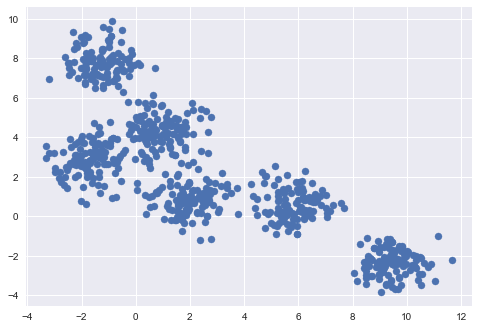

In [3]:
plt.scatter(X[:,0], X[:,1], s=50)

Looking at this graph it's apparent that there are about 6 different clusters. Let's see of K-Means agrees with our visualization. 

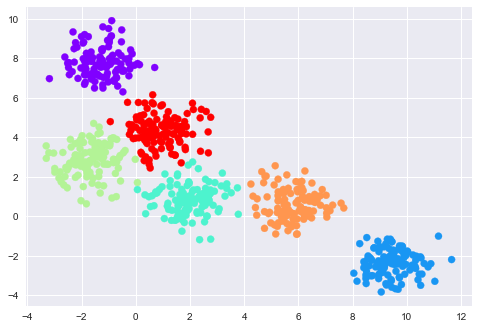

In [4]:
clusters = KMeans(6) 
clusters.fit(X)
y_kmeans = clusters.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')

Ah-ha! Looks like our visual assessment matches the algorithm. 

##### Let's take a look at another data set we will use later, the classic Iris dataset.

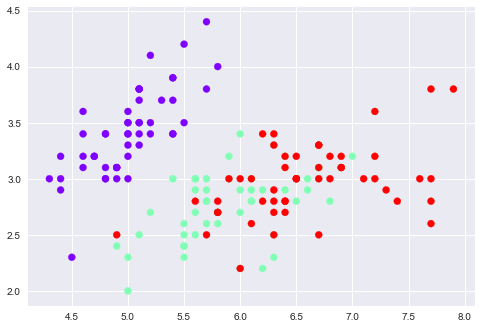

In [5]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

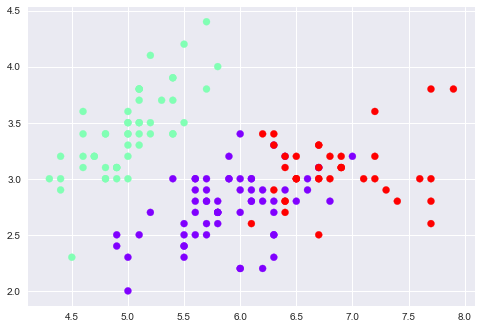

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

Here we see that the K-Means algorithm did a pretty good job of separating the data without any labels

### Real World Example: color compression

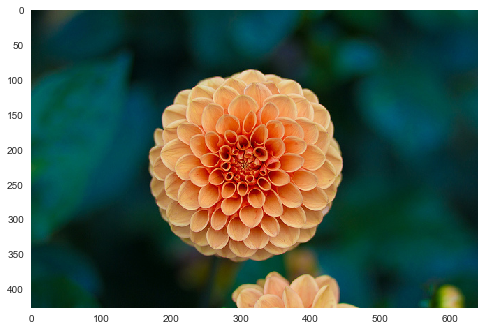

In [7]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
plt.imshow(flower)
plt.grid(False);

In [8]:
#check the shape of the dataframe (impage)
flower.shape

(427, 640, 3)

In [9]:
#the image is 3-dimensional arragey of: hieght, width, and RGB (colors). 
X = (flower / 255.0).reshape(-1,3)
#this converts the image into a numpy array

In [10]:
print(X.shape, type(X))

((273280, 3), <type 'numpy.ndarray'>)


We now want to compress these 273,280 colors in our 3 dimensions into a smaller number. Essentially, we want to find Ncolor clusters, to create a new image, replacing the true color with the color of the closest color. 

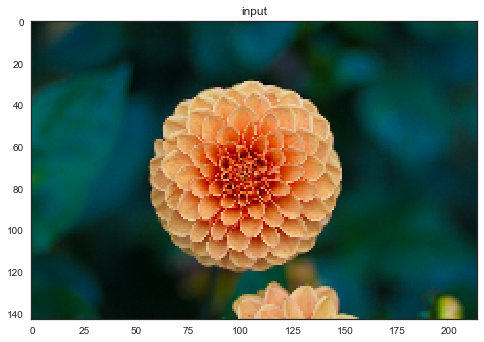

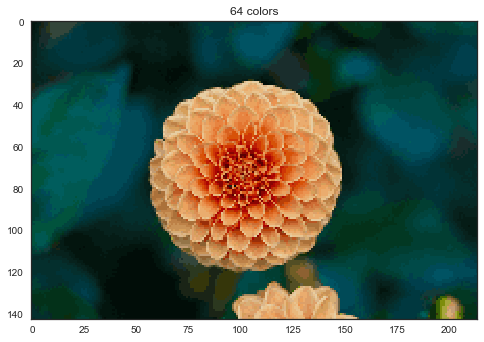

In [11]:
#reduce image size, to speed up processing 
image = flower[::3, ::3]
n_colors=64

X = (image/255.0).reshape(-1,3)

model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_pic = colors[labels].reshape(image.shape)
new_pic = (255* new_pic).astype(np.uint8)

#plot the new image 
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_pic)
    plt.title('{0} colors'.format(n_colors))

And now we've taken 273,280 colors, and compressed them to 64. 

# Naive Bayes (supervised algorithm)

let's take a look at a supervised learning algorithm, Naive Bayes. 
We will be using a slightly different data set on wine quality: 
source
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
#our required imports
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
wine_data = "/Users/Joshua/Downloads/Wine_data.xlsx"
#wine_data = "C:/Users/jdweaver/Documents/ism6357_weaver_advanced_analytic_methods_programming/data/wine_data.xlsx"
df = pd.read_excel(wine_data, sheetname='red_wine')
#notice this is an excel file, and we used pd.read_excel to read in the file
#this excel doc also has multiple sheets so we had to specify which seet to use. 


In [14]:
#lets take a peek at what our data looks like
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
#here we see number of columns and rows, how many of which do we have? 
df.shape

(1599, 12)

notice that for this data set, all the columns contain float numbers so no need to map any categorical values to numeric ones 

In [16]:
#lets look at just the names of our columns
df.columns 

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

### The scikit-learn modeling pattern
1. Create a feature matrix and response vector (our independent or exogenous variables and dependent of endogenous variables)
2. Decide on the estimator you want to use and import that class 
3. "Instantiate" the "estimator" 
4. Fit the model with the data (model training)
5. Evaluate the model fit

In [17]:
#1a--define our feature matrix, this will hold all of our predictor/independent/exogenous variables
#since we want everything except our label or response vector "quality" we can drop quality, and voila we have 
X = df.drop(['quality'], axis = 1)
#or this way X = df.loc[:,'fixed acidity':'alcohol']

In [18]:
X.shape #now we have all 11 exogenous variables, excluding our label/dependent/endogenous variable

(1599, 11)

In [19]:
#1b--define or label/dependent variable vector, remember it has to be a numpy array 
y = np.array(df['quality'])

In [20]:
y[:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

Naive Bayes is most often used in binary classification systems, although applicable to other multiple category classification as well. 
To keep things simple, let's dichotomize our dependent variable

In [21]:
#first lets do a count distinct of quality to see how we could dichtomize the variable
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [22]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Data set is fairly unbalanced across categories

In [23]:
y[y < 6] = 0
y[y >= 6] = 1

#one could argue that quality scores of 5 and 6 are still high quality, but for purposes of this example
#I wanted to create a slightly more balanced dataset for learning purposes

In [24]:
y[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [25]:
#our variables need to be same height, let's verify this 
print("X", X.shape, "y", y.shape)

('X', (1599, 11), 'y', (1599,))


In [26]:
#let's also check the distribution of our dichtomized variable

print("DV Distribution", {0: np.sum(y == 0), 1: np.sum(y == 1)})

('DV Distribution', {0: 744, 1: 855})


In [27]:
#2-Decide on the estimator you want to use and import that class 
from sklearn.naive_bayes import GaussianNB

In [28]:
#3 "Instantiate" the "estimator" 
nb = GaussianNB()

GaussianNB()

GaussianNB(priors=None)

In [29]:
#4. Fit the model with the data (model training)
#5. Use the model to predict the response for a new observation 
#6. Evaluate the model fit

from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X,y, cv=10, scoring='accuracy')

print(scores)

[ 0.59006211  0.8136646   0.73913043  0.59627329  0.66875     0.8490566
  0.71698113  0.73584906  0.7672956   0.69811321]


In [30]:
cross_val_score(nb, X,y, cv=10, scoring='accuracy').mean()

0.71751760322668856

# Support Vector Machines

Another binary classification algorithm, quite robust and often used in "real life". 
This algorithm tries to find a line (with a 2-dimensional data set) or a hyperplane (most common in real world data sets) that best splits the data into two groups (in the case of binary classification). Occassionaly, you have to use a kernel trick (discussed later) to create an n-dimensional space to achieve an optimum hyperplane. 


### We will be using the [SVC implementation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) based on libsvm. There are 2 main parameters: gamma and C. 
- small gamma: the model is constrained, it can under fit our data 
- large gamma: can over fit by trying to model the data exactly, not good for out of sample prediction

- small C: makes the decision surface smoth and simple
- big C: selects more support vectors. Support vectors are the data points that are closest to the hyperplane, sort of like the boundaries of the hyperplane

### Recall the scikit-learn modeling pattern
1. Create a feature matrix and response vector (our independent or exogenous variables and dependent of endogenous variables)
2. Decide on the estimator you want to use and import that class 
3. "Instantiate" the "estimator" 
4. Fit the model with the data (model training)
5. Evaluate the model fit

#### We already created our X and y so let's move on to step 2. 

In [31]:
#2-Decide on the estimator you want to use and import that class 
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=1) 

In [32]:
print(cross_val_score(svc, X,y, cv=10, scoring='accuracy').mean())

0.645202498144


#### Note per the documentation the SVC implementation doesn't work well on larger samples. So for fun, let's try a different implementation [NuSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)

In [33]:
from sklearn import svm
nu = svm.NuSVC()

In [34]:
nu #lets look at the parameters we can set

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(cross_val_score(nu, X, y, cv=10, scoring='accuracy').mean())

### Earlier, I mentioned the kernel trick. Let's take a look at this now. 
The kernel trick projects our data into an n-dimensional space and works to fit a hyperplane that enables us to linearly separate our data. 

More info on the [kernel trick](https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78)

More info on [hyperplanes and SVMs](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)

We will use the kernel trick to play around with 3 kernels: 
- [radial basis function](http://pro.arcgis.com/en/pro-app/help/analysis/geostatistical-analyst/how-radial-basis-functions-work.htm): work for non-linear hyperplanes
- [linear](http://pyml.sourceforge.net/doc/howto.pdf): useful for data that can be separated linearly in n-dimensional space (more than 2 dimensions), these tend to work well for text classification given the number of their features and general behavior of text
- [polynomial kernels](https://en.wikipedia.org/wiki/Polynomial_kernel): works similar to polynomial regression, however it has to learn many more parameters for the hyperplane

In [39]:
#let's go back to our familiar iris dataset 
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features.
iris_y = iris.target

In [40]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel

linear_svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)

poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

In [41]:
# create a mesh to plot
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [42]:
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

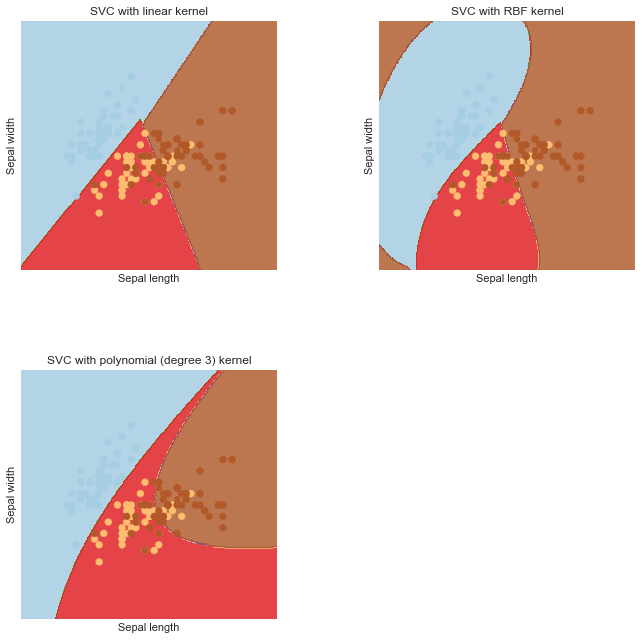

In [43]:

from pylab import rcParams
rcParams['figure.figsize'] = 11, 11  # set plot size

for i, clf in enumerate((linear_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [446]:
print 'SVC with linear kernel score: ',cross_val_score(linear_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()
print 'SVC with RBF kernel score: ',cross_val_score(rbf_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()
print 'SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()

 SVC with linear kernel score:  0.813333333333
SVC with RBF kernel score:  0.806666666667
SVC with polynomial (degree 3) kernel score:  0.8


## ...and with another dataset

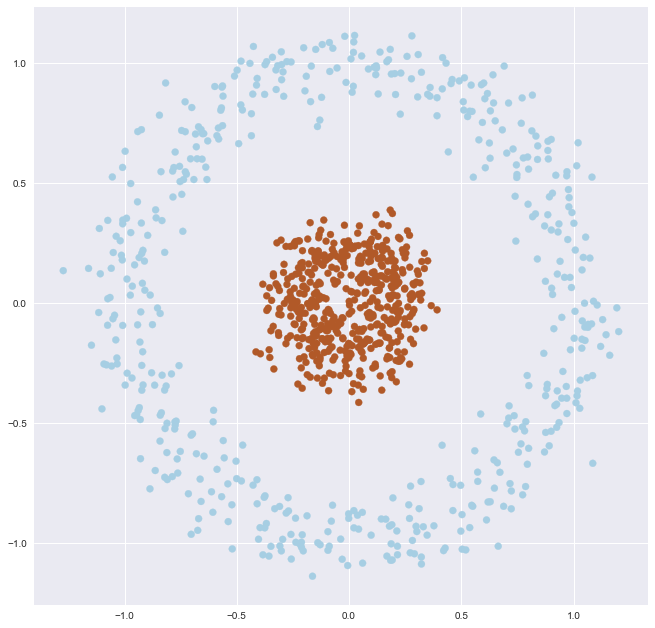

In [447]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
cm = cmap=plt.cm.Paired
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y, cmap=cm)

In [448]:

circles_y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0,

In [450]:
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.48899999999999999

In [451]:
# a linear SVM
clf = svm.SVC(kernel = 'linear')      
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.65200000000000002

In [453]:
#with a 3rd degree polynomial 
clf = svm.SVC(kernel = 'poly', degree = 4)        # I like 3rd degree polys
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.98299999999999998

In [454]:
#with a radial basis function
clf = svm.SVC(kernel = 'rbf')          
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

1.0

hmmmm the rbf model seems overfitted, don't you think? Let's take a look...

In [455]:
logreg.fit(circles_X, circles_y)
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

In [456]:
# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [457]:
# title for the plots
titles = ['Logistic Regression ',
          'SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']

Logistic Regression score:  0.489
SVC with linear kernel score:  0.652
SVC with polynomial (degree 3) kernel score:  0.567
SVC with RBF kernel score:  1.0


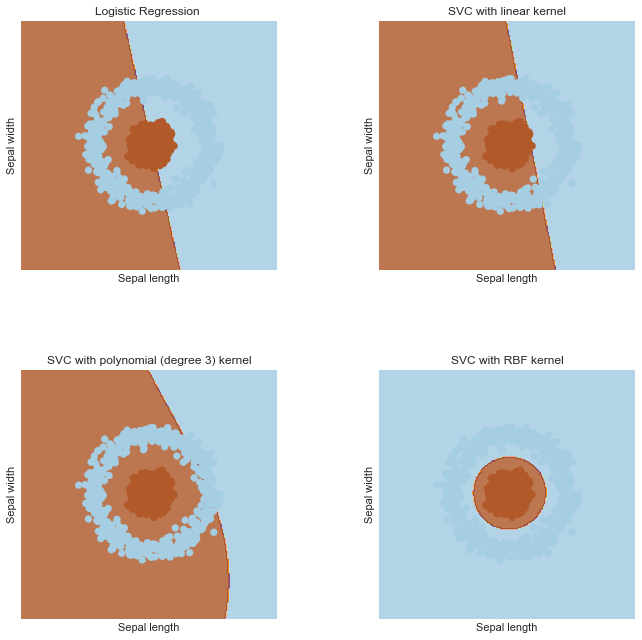

In [458]:
print 'Logistic Regression score: ',cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with linear kernel score: ',cross_val_score(svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with RBF kernel score: ',cross_val_score(rbf_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()


for i, clf in enumerate((logreg, svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()